# Maps of affectation

## Libraries

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd

# WEA FOR MAPAS PERRONES

In [2]:
mtwa_12 = pd.read_csv('MTWA_20180504_1200_Kp1_AsympDir_SEP80perc.txt', sep = ',', header = 0, engine = 'python')
mtwa_18 = pd.read_csv('MTWA_20180504_1800_Kp1_AsympDir_SEP80perc.txt', sep = ',', header = 0, engine = 'python')
nain_12 = pd.read_csv('NAIN_20180504_1200_Kp1_AsympDir_SEP80perc.txt', sep = ',', header = 0, engine = 'python')
nain_18 = pd.read_csv('NAIN_20180504_1800_Kp1_AsympDir_SEP80perc.txt', sep = ',', header = 0, engine = 'python')

# ad_data.info()
# 0 forbidden
# 1 allowed in magnetopause
# 2 undetermined
# 3 calculation with wrong step size
# 4 allowed in magnetotail
# gse (geocentered solar ecliptic) centered at Earth's center,x axis sunwards and z axis perpendicular to ecliptic
# gsm (geocentric solar magnetosferic) x axis sunwards and z axis along geomagnetic dipole projection
# geo x lies on greenwich and z is north pole
# tag neutron monitor (Mt.Washington or Nane)
# rig particle rigidity
# zen zenith angle
# azi azimuthal angle

mtwa_12 = mtwa_12[(mtwa_12.infi == 1) | (mtwa_12.infi == 4)].reset_index().filter(['algeo', 'apgeo', 'rig', 'infi'])
mtwa_12['long_perrona'] = mtwa_12['apgeo'].apply(lambda long_culera: long_culera-360 if long_culera > 180 else long_culera)

mtwa_18 = mtwa_18[(mtwa_18.infi == 1) | (mtwa_18.infi == 4)].reset_index().filter(['algeo', 'apgeo', 'rig', 'infi'])
mtwa_18['long_perrona'] = mtwa_18['apgeo'].apply(lambda long_culera: long_culera-360 if long_culera > 180 else long_culera)

nain_12 = nain_12[(nain_12.infi == 1) | (nain_12.infi == 4)].reset_index().filter(['algeo', 'apgeo', 'rig', 'infi'])
nain_12['long_perrona'] = nain_12['apgeo'].apply(lambda long_culera: long_culera-360 if long_culera > 180 else long_culera)

nain_18 = nain_18[(nain_18.infi == 1) | (nain_18.infi == 4)].reset_index().filter(['algeo', 'apgeo', 'rig', 'infi'])
nain_18['long_perrona'] = nain_18['apgeo'].apply(lambda long_culera: long_culera-360 if long_culera > 180 else long_culera)

In [ ]:
#  Special thx to:
# https://stackoverflow.com/questions/50939821/aligning-data-contourf-on-basemap

lowlon = -180 # lower corner longitude
lowlat = -90 # lower corner latitude
upplon = 180 # upper corner longitude
upplat = 90 # upper corner latitude

# data for z (2D array)
h2o_north = np.linspace(1, 65, num=90)
h2o_south = np.flipud(h2o_north)
h2o = np.append(h2o_north, h2o_south)
data = np.transpose(np.tile(h2o, (len(h2o_north), 1))) # tile repeats the array

# create figure and axes instances
fig = plt.figure(figsize=(18, 11))
ax = fig.add_subplot()

# create basemap instance
m = Basemap(llcrnrlon = lowlon,
            llcrnrlat = lowlat,
            urcrnrlon = upplon,
            urcrnrlat = upplat,
            projection = 'mill', # Lambert conformal projection
            lat_0 = 0, # center lat
            lon_0 = 0, # center lon
            ax = ax
           )

# create meshgrid covering the whole globe with ...
# conforming dimensions of the `data`
lat = np.linspace(lowlat, upplat, data.shape[0]) # where to plot data
lon = np.linspace(lowlon, upplon, data.shape[1]) # where to plot data
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

m.shadedrelief()
m.drawparallels(np.arange(-90, 90, 30), labels = [1, 0, 0, 1],
                  fontsize=20, fontname = 'C059', color = 'k', linewidth = 1)
m.drawmeridians(np.arange(m.lonmin, m.lonmax + 30, 60),
                  labels=[1, 0, 0, 1], fontsize=20, fontname = 'C059',
                  color = 'k', linewidth = 1)

x1, y1 = m(mtwa_12.long_perrona, mtwa_12.algeo)
scatterplot1 = m.scatter(x1, y1, c = mtwa_12.rig, marker = 'o',
                        cmap = 'cool', s=15, zorder = 100, label = 'MTWA 12:00')

x2, y2 = m(mtwa_18.long_perrona, mtwa_18.algeo)
scatterplot2 = m.scatter(x2, y2, c = mtwa_18.rig, marker = 's',
                        cmap = 'cool', s=15, zorder = 100, label = 'MTWA 18:00')

x3, y3 = m(nain_12.long_perrona, nain_12.algeo)
scatterplot3 = m.scatter(x3, y3, c = nain_12.rig, marker = 'P',
                        cmap = 'magma_r', s=15, zorder = 100, label = 'NAIN 12:00')

x4, y4 = m(nain_18.long_perrona, nain_18.algeo)
scatterplot4 = m.scatter(x4, y4, c = nain_18.rig, marker = 'D',
                        cmap = 'magma_r', s=15, zorder = 100, label = 'NAIN 18:00')
plt.legend()
ax.tick_params(axis = 'both', which = 'both', direction = 'in', 
            labelsize = 23, color = 'k', width = 1.1, length = 10)

cbar1 = m.colorbar(scatterplot1, location='right', pad="1%")
cbar1.set_label('Magnetic rigidity [GV]', fontsize=20,
          fontweight='bold', color="black", fontname = 'C059')

cbar4 = m.colorbar(scatterplot4, location='bottom', pad="10%")
cbar4.set_label('Magnetic rigidity [GV]', fontsize=20,
          fontweight='bold', color="black", fontname = 'C059')

plt.show()

In [51]:
data.shape

(180, 90)

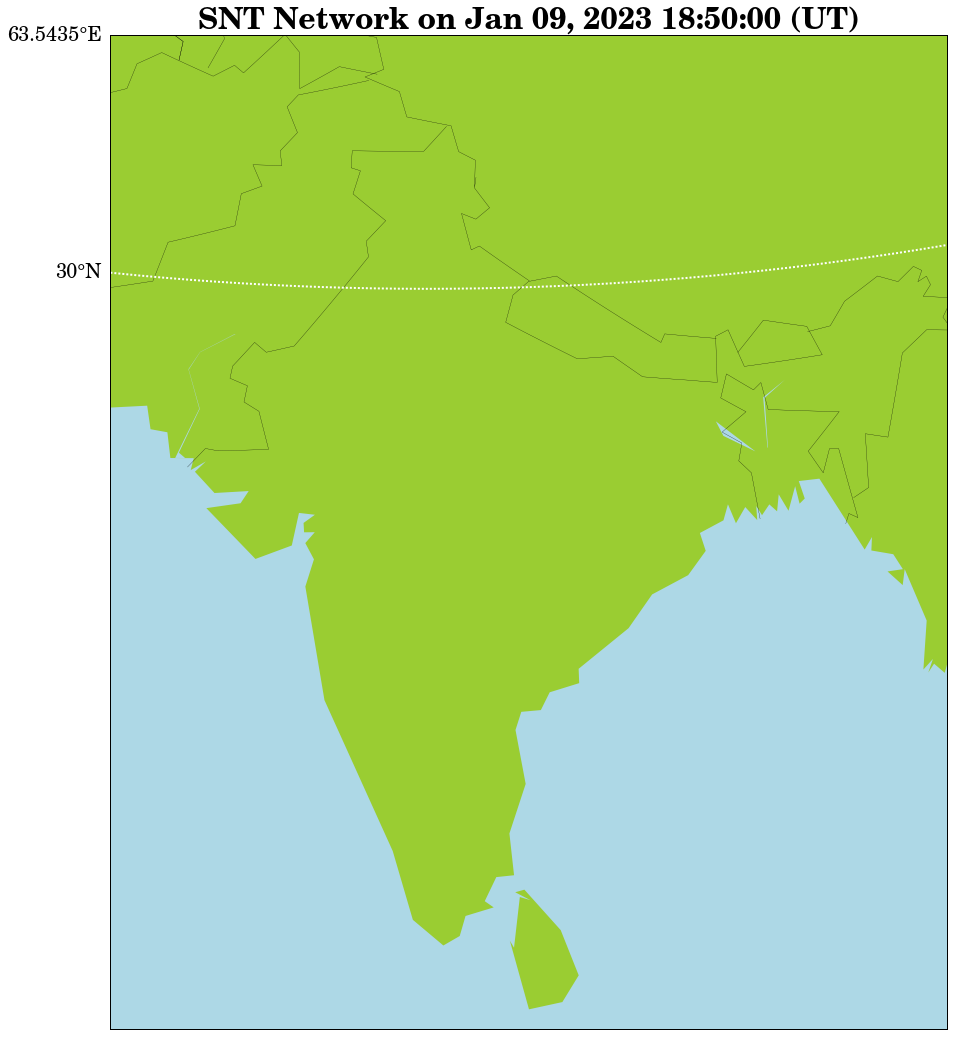

In [18]:
# Special thx to:
# https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
# https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot

fig0 = plt.figure(figsize = (15,20))
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0])

map = Basemap(llcrnrlon = 67, # lower corner longitude
              llcrnrlat = 5, # lower corner latitude
              urcrnrlon = 99, # upper corner longitude
              urcrnrlat = 37, # upper corner latitude
              projection = 'lcc', # Lambert conformal projection
              lat_0 = 28, # center lat
              lon_0 = 77 # center lon
             )
# map.bluemarble() Mapa chingón pero pesado
map.drawcoastlines(linewidth = 0)
map.drawcountries(linewidth=0.25)
map.drawparallels(np.arange(-90, 90, 30), labels = [1, 0, 0, 1],
                  fontsize=20, fontname = 'C059', color = 'w', linewidth = 2)
map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60),
                  labels=[1, 0, 0, 1], fontsize=20, fontname = 'C059',
                  color = 'w', linewidth = 2)
map.fillcontinents(color='yellowgreen', lake_color='lightblue')
map.drawmapboundary(fill_color='lightblue')
# CS=map.nightshade(d, color = 'slategray', alpha = 0.4)# Shade the night areas

# lats, lons, obs
coords = [
          [-97.3, 19.0, 'Sierra Negra, \nMexico'], 
          [-68.0, -16.2, 'Chacaltaya, \nBolivia'],
          [137.5, 36.1, 'Norikura, \nJapan'],
          [40.5, 44.2, 'Aragats, \nArmenia'],
          [-156.3, 19.8, 'Mauna Kea, \nUSA'],
          [90.5, 30, 'Tibet, \nChina'],
#           [7.8, 40.6, 'Gornergrat, \nSwitzerland']
         ]

# for lat, lon, obs in coords:
#     x,y = map(lat, lon)
#     map.scatter(x, y, color = 'red', marker = '*', s = 180, edgecolor = 'k')
#     plt.text(x*(1 + 0.01), y*(1 + 0.01), obs, color = 'black',
#              fontsize = 15, fontweight = 'bold')
# plt.title('Day/Night Map for %s (UT)' % d.strftime("%d %b %Y %H:%M:%S"),
plt.title(f'SNT Network on {d.strftime("%b %d, %Y %H:%M:%S")} (UT)',
      fontsize = 30, fontweight = 'bold', color = "black", fontname = 'C059')
# plt.ylabel('Long. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 
# plt.xlabel('Lat. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 

# plt.savefig('SNT_Network_Map.png', dpi = 'figure', bbox_inches= 'tight')

plt.show()